#### The three observation: 1.It gets hotter as you get closer to the equator.  2. Now this season, the world is generally in the time of relatively high humidity, but there are still areas with zero humidity, the closer to the equator, the more such areas.

In [61]:
import json
import requests
from api_keys import api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from citipy import citipy
from scipy.stats import linregress
import csv

## Generate the list of 500+ cities

In [7]:
cities = []


while len(cities) < 550:
    lat_random = random.randint(-90, 90) #-90 to 90
    lon_random = random.randint(-190, 180) #-180 to 190
    city = citipy.nearest_city(lat_random, lon_random)
    if city.city_name not in cities:
        cities.append(city.city_name)

In [8]:
pd.DataFrame(cities)

,0
0,luderitz
1,punta arenas
2,tanabe
3,vaini
4,provideniya
...,...
545,abha
546,bilibino
547,mangai
548,gurskoye


In [9]:
#set up all the list that you want to use
url = "http://api.openweathermap.org/data/2.5/weather?"
country_500 = []
longtitude_500 = []
latitude_500 = []
temperature_500 = []
cloudiness_500 = []
wind_speed_500 = []
humidity_500 = []
cities_500 = []

In [10]:
#loop all the cities with API key to find all the numbers
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        country_500.append(weather_json["sys"]["country"])
        longtitude_500.append(weather_json["coord"]["lon"])
        latitude_500.append(weather_json["coord"]["lat"])
        temperature_500.append(weather_json["main"]["temp"])
        cloudiness_500.append(weather_json["clouds"]["all"])
        wind_speed_500.append(weather_json["wind"]["speed"])
        humidity_500.append(weather_json["main"]["humidity"])
        cities_500.append(weather_json["name"])
        print(f"there is right data in {city}")
    except:
        print(f"there is no data in {city}")
print(len(country_500))

there is right data in luderitz
there is right data in punta arenas
there is right data in tanabe
there is right data in vaini
there is right data in provideniya
there is right data in rikitea
there is right data in sao marcos
there is right data in kavieng
there is right data in thompson
there is right data in busselton
there is right data in carnarvon
there is right data in new norfolk
there is right data in husavik
there is right data in atuona
there is no data in mentok
there is right data in mar del plata
there is right data in cangucu
there is right data in laguna
there is right data in bathsheba
there is no data in grand river south east
there is right data in sinnamary
there is right data in ushuaia
there is right data in faanui
there is right data in san onofre
there is no data in tsihombe
there is right data in hilo
there is right data in mabaruma
there is right data in sabang
there is right data in saint-philippe
there is right data in meulaboh
there is right data in albany


there is right data in victoria
there is right data in isla vista
there is right data in narsaq
there is right data in tasiilaq
there is right data in praia
there is right data in umm lajj
there is no data in do rud
there is right data in roslavl
there is right data in pochutla
there is no data in samusu
there is right data in leningradskiy
there is right data in ostrovnoy
there is right data in lokosovo
there is right data in rio grande
there is right data in xiaoshi
there is right data in salalah
there is no data in sogdiondon
there is right data in tessalit
there is right data in gamba
there is right data in akyab
there is right data in itacoatiara
there is right data in acarau
there is right data in chiguayante
there is right data in unguia
there is no data in kazalinsk
there is right data in mount gambier
there is right data in nishihara
there is no data in amderma
there is right data in airai
there is right data in norton shores
there is right data in itaituba
there is right data

there is right data in sao joao da barra
there is right data in gravdal
there is right data in lubaczow
there is right data in arlit
there is right data in wicklow
there is right data in adre
there is right data in iranshahr
there is right data in garowe
there is right data in malakal
there is no data in mrirt
there is right data in port shepstone
there is right data in agadez
there is right data in kavali
there is right data in lima
there is right data in fukue
there is right data in taoudenni
there is right data in masumbwe
there is right data in pitimbu
there is right data in salinas
there is right data in kysyl-syr
there is right data in general pico
there is right data in havre
there is right data in davidson
there is right data in verkh-usugli
there is right data in presidencia roque saenz pena
there is right data in peleduy
there is right data in camacha
there is right data in muros
there is right data in bichura
there is right data in abonnema
there is right data in lyuban
ther

In [64]:
#put data into a dataframe
weather_500_pf = pd.DataFrame({"Country" : country_500,
                               "City" : cities_500,
                               "Longtitude" : longtitude_500,
                               "Latitude" : latitude_500,
                               "Temperature" : temperature_500,
                               "Cloudiness" : cloudiness_500,
                               "Humidity" : humidity_500,
                              "Wind Speed" : wind_speed_500})

#save all the data to a csv file
weather_500_pf.to_csv('weather_500_list.csv', index=False,header =True)

## Temperature (F) vs. Latitude

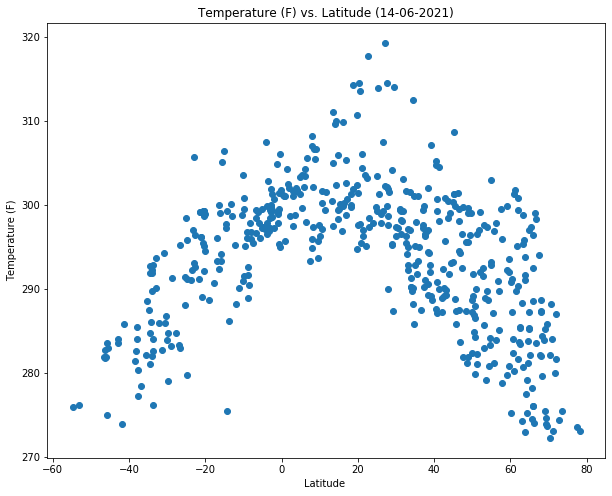

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,temperature_500)
plt.xlabel("Latitude ")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude (14-06-2021)")
plt.savefig("Temperature (F) vs. Latitude (14-06-2021).png")
plt.show()

### This scatter plot is generate the temperature change from north to south, the temperature is higher when the location is more close to equator

## Humidity (%) vs. Latitude

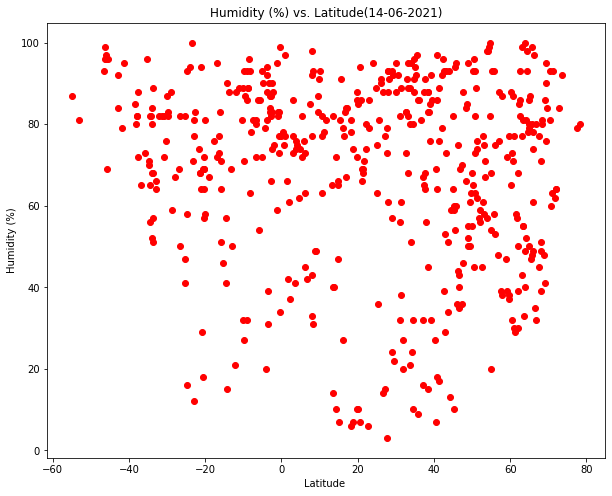

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,humidity_500, color = 'r')
plt.xlabel("Latitude ")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude(14-06-2021)")
plt.savefig("Humidity (%) vs. Latitude(14-06-2021).png")
plt.show()

### This scatter plot shows the humidity level across different latitude,  at this season the humidity is high in average.

## Cloudiness (%) vs. Latitude

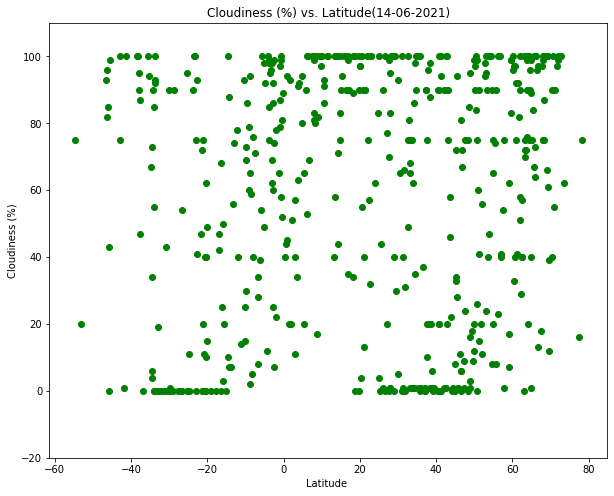

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,cloudiness_500, color = 'g')
plt.ylim(-20,(weather_500_pf["Cloudiness"].max()+10))
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude(14-06-2021)")
plt.savefig("Cloudiness (%) vs. Latitude(14-06-2021)).png")
plt.show()

### This scatter plot shows the cloudiness level across different latitude, some of the places around 20-40 in northern and southern have no cloud at all, and some of the place in northern places have maximum of cloudiness.

## Wind Speed (mph) vs. Latitude

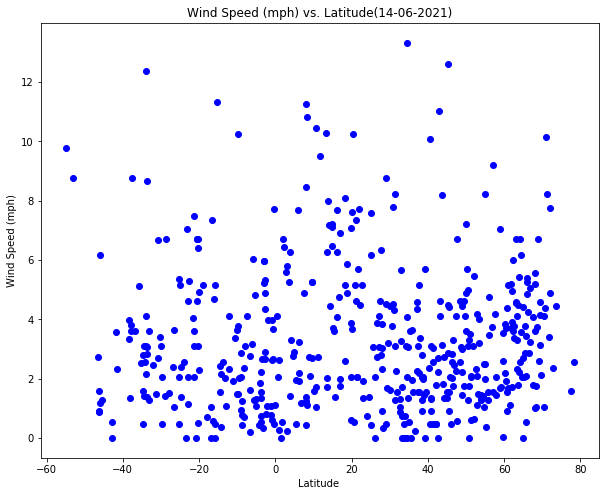

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,wind_speed_500, color = 'b')
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude(14-06-2021)")
plt.savefig("Wind Speed (mph) vs. Latitude(14-06-2021).png")
plt.show()

### This scatter shows the wind speed acorss different latitude, most of the places' wind speed are under 8.

In [69]:
northern_hemisphere = weather_500_pf.loc[weather_500_pf["Latitude"] >= 0]
southern_hemisphere = weather_500_pf.loc[weather_500_pf["Latitude"] < 0]
northern_hemisphere.head()

,Country,City,Longtitude,Latitude,Temperature,Cloudiness,Humidity,Wind Speed
2,JP,Tanabe,135.3667,33.7333,297.00,75,80,0.45
4,RU,Provideniya,-173.3000,64.3833,275.30,100,98,3.58
8,CA,Thompson,-97.8558,55.7435,281.24,90,93,1.54
12,IS,Husavik,-17.3389,66.0449,276.10,100,74,5.38
16,US,Laguna,-121.4238,38.4210,290.57,1,88,0.89


## Temperature (F) vs. Latitude-North

The r-squared is: 0.4750695640777054


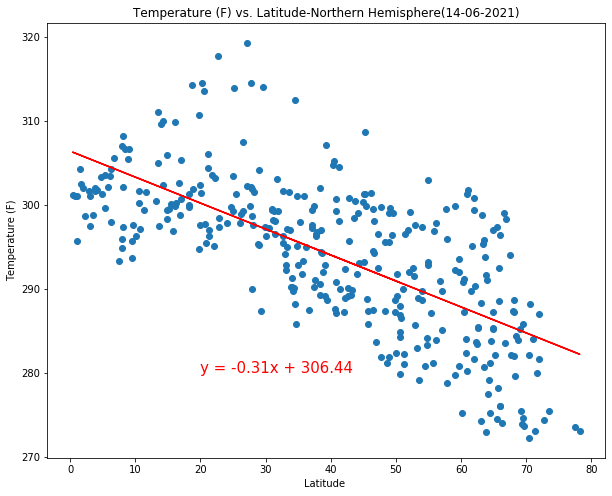

In [70]:
#calculate the linear value
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,280),fontsize=15,color="red")
plt.xlabel("Latitude ")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude-Northern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Temperature (F) vs. Latitude-Northern Hemisphere (14-06-2021).png")
plt.show()

### This scatter plot shows the temperature in northern hemisphere, the temperature is higher when close to equator.

## Temperature (F) vs. Latitude-South

The r-squared is: 0.6054010134203005


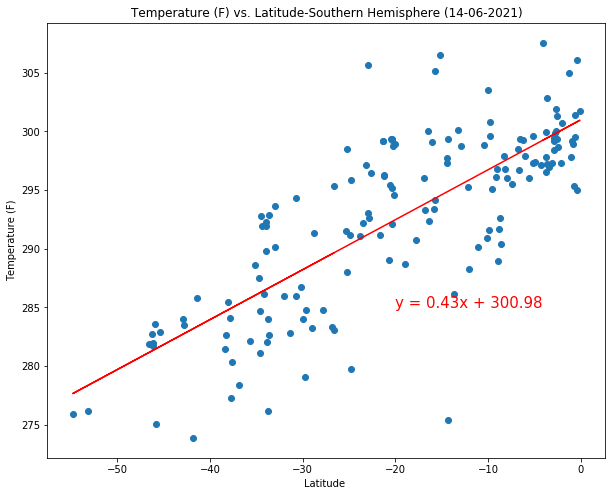

In [71]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Temperature"]
#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,285),fontsize=15,color="red")
plt.xlabel("Latitude ")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude-Southern Hemisphere (14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Temperature (F) vs. Latitude-Southern Hemisphere (14-06-2021).png")
plt.show()

### This scatter plot shows the temperature in southern hemisphere, the temperature is higher when close to equator.

## Humidity (%) vs. Latitude-North

The r-squared is: 0.0007411030843202741


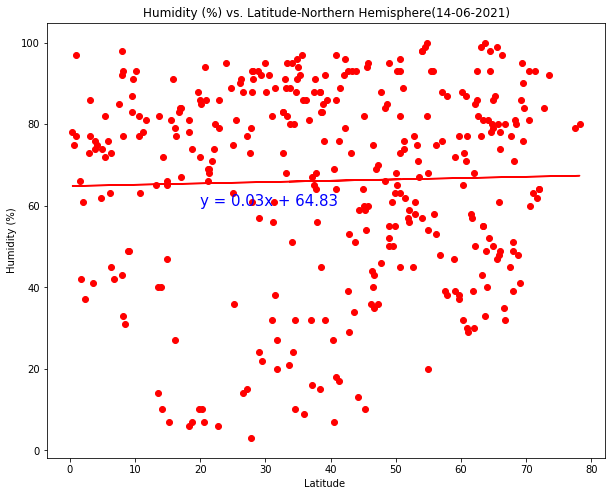

In [72]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color = 'r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="blue")
plt.xlabel("Latitude ")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude-Northern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Humidity (%) vs. Latitude-Northern Hemisphere(14-06-2021).png")
plt.show()

### This scatter plot shows the humidity in northern hemisphere, the humidity doesn't change in a significant amount.

## Humidity (%) vs. Latitude-South

The r-squared is: 0.00798446899326069


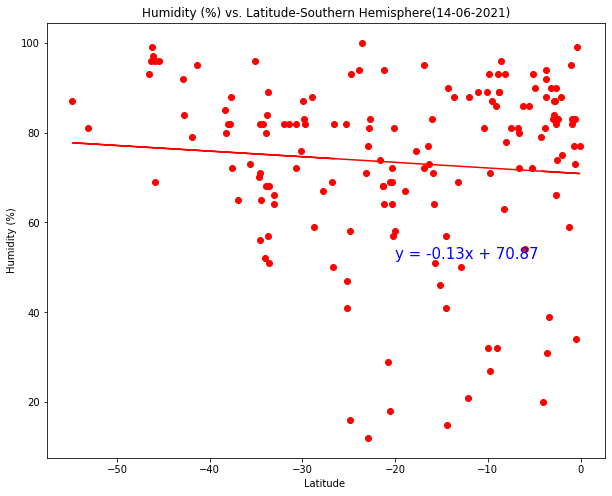

In [73]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color = 'r')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,52),fontsize=15,color="blue")
plt.xlabel("Latitude ")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude-Southern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Humidity (%) vs. Latitude-Southern Hemisphere(14-06-2021).png")
plt.show()

### This scatter plot shows the humidity in southern hemisphere, the humidity doesn't change in a significant amount.

## Cloudiness (%) vs. Latitude-North

The r-squared is: 0.0002644615936291605


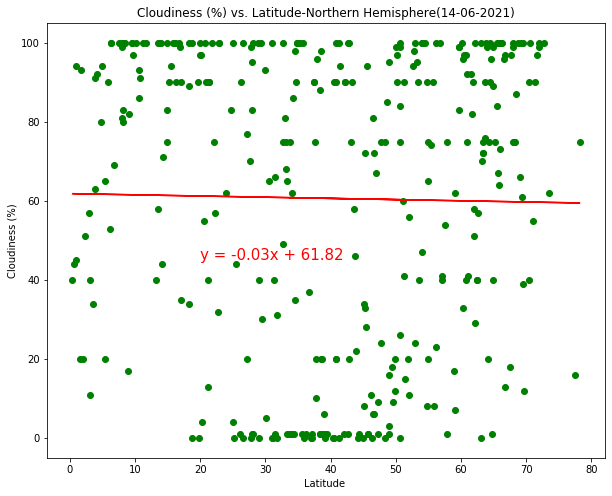

In [74]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color = 'g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude-Northern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cloudiness (%) vs. Latitude-Northern Hemisphere(14-06-2021).png")
plt.show()

### This scatter plot shows the cloudiness in northern hemisphere, the cloudiness doesn't change in a significant amount.

## Cloudiness (%) vs. Latitude-South

The r-squared is: 0.013306606109464193


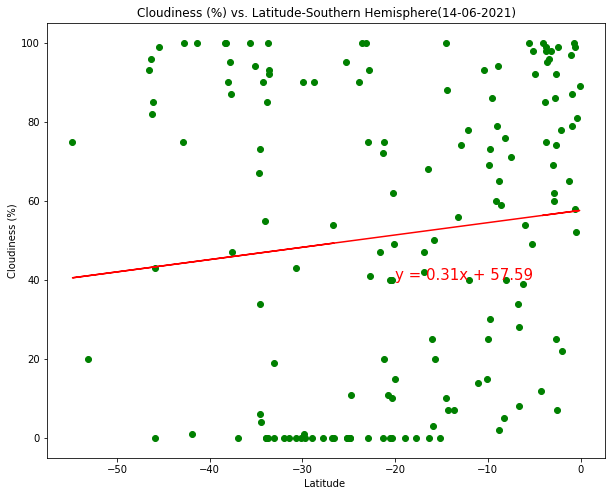

In [75]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]

#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color = 'g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude-Southern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Cloudiness (%) vs. Latitude-Southern Hemisphere(14-06-2021).png")
plt.show()

### This scatter plot shows the cloudiness in southern hemisphere, the cloudiness will increase when close to equator.

## Wind Speed (mph) vs. Latitude-North

The r-squared is: 0.006726526749729998


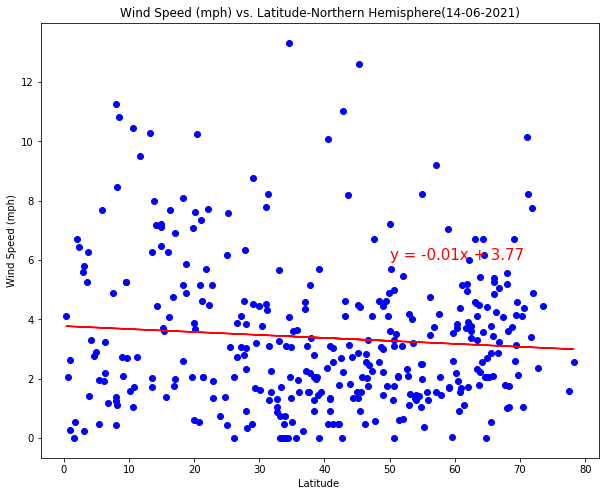

In [76]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,6),fontsize=15,color="red")
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude-Northern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Wind Speed (mph) vs. Latitude-Northern Hemisphere(14-06-2021).png")
plt.show()

### This scatter plot shows the wind speed in northern hemisphere, the wind speed doesn't change in a significant amount.

## Wind Speed (mph) vs. Latitude-South

The r-squared is: 0.019139347339177288


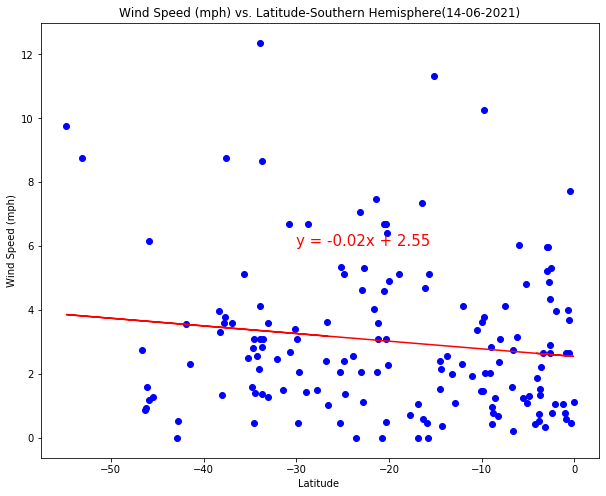

In [77]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

#calculate the linear value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

#put this into a function
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(x_values,y_values, color = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,6),fontsize=15,color="red")
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude-Southern Hemisphere(14-06-2021)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Wind Speed (mph) vs. Latitude-Southern Hemisphere(14-06-2021).png")
plt.show()

### This scatter plot shows the wind speed in southern hemisphere, the wind speed doesn't change in a significant amount.